# Data Preparation

## Import Libraries

In [ ]:
!pip install gdown

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

## Import Data


sales_data_ext.csv

In [ ]:
sheet_url = 'https://drive.google.com/file/d/1T8dA2AF7j0XlPQoz_IJDauE5IrRwODWm/view?usp=sharing'
sheet_url_replace = 'https://drive.google.com/uc?id='+ sheet_url.split('/')[-2]

print(sheet_url_replace)

https://drive.google.com/uc?id=1T8dA2AF7j0XlPQoz_IJDauE5IrRwODWm


In [ ]:
df_sales = pd.read_csv(sheet_url_replace)
df_sales.head()

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
0,100000006,X,A,91.0,0,25000.0,1,NaN,0,25000.0,26,5,1996-11-03
1,100000038,X,A,69.0,0,9000.0,5,10000.0,2,10000.0,25,10,1971-04-24
2,100000382,X,A,123.0,1,17330.0,6,16000.0,3,20000.0,18,6,1953-01-16
3,100000453,X,A,88.0,1,14000.0,4,14670.0,3,15000.0,24,6,1944-11-27
4,100000472,X,A,120.0,0,12500.0,1,12500.0,1,15000.0,23,5,1973-01-09


xsell_campaign_result.csv

In [ ]:
sheet_url2 = 'https://drive.google.com/file/d/1Ji3T9T_IjmsKS22ZVmbL6VuHn_1HhiPA/view?usp=sharing'
sheet_url_replace2 = 'https://drive.google.com/uc?id='+ sheet_url2.split('/')[-2]

print(sheet_url_replace2)

https://drive.google.com/uc?id=1Ji3T9T_IjmsKS22ZVmbL6VuHn_1HhiPA


In [ ]:
df_xsell = pd.read_csv(sheet_url_replace2)
df_xsell.head()

,account_id,xsell_success,xsell_sales,xsell_count
0,100000006,0,NaN,0.0
1,100000038,1,10000.0,2.0
2,100000382,0,NaN,0.0
3,100000453,0,NaN,0.0
4,100000472,0,NaN,0.0


In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16487 entries, 0 to 16486
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_id               16487 non-null  int64  
 1   account_activity_level   16487 non-null  object 
 2   customer_value_level     16487 non-null  object 
 3   MOB                      16487 non-null  float64
 4   flag_female              16487 non-null  int64  
 5   avg_sales_L36M           15726 non-null  float64
 6   cnt_sales_L36M           16487 non-null  int64  
 7   avg_sales_L36M_promo     12094 non-null  float64
 8   cnt_sales_L36M_promo     16487 non-null  int64  
 9   last_sales               16487 non-null  float64
 10  month_since_last_sales   16487 non-null  int64  
 11  count_direct_promo_L12M  16487 non-null  int64  
 12  birth_date               16487 non-null  object 
dtypes: float64(4), int64(6), object(3)
memory usage: 1.6+ MB


In [ ]:
df_xsell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16487 entries, 0 to 16486
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   account_id     16487 non-null  int64  
 1   xsell_success  16487 non-null  int64  
 2   xsell_sales    2946 non-null   float64
 3   xsell_count    16487 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 515.3 KB


##Merge Datasets

In [ ]:
df_og = pd.merge(df_sales, df_xsell, on='account_id', how='inner')
df_og.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16487 entries, 0 to 16486
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_id               16487 non-null  int64  
 1   account_activity_level   16487 non-null  object 
 2   customer_value_level     16487 non-null  object 
 3   MOB                      16487 non-null  float64
 4   flag_female              16487 non-null  int64  
 5   avg_sales_L36M           15726 non-null  float64
 6   cnt_sales_L36M           16487 non-null  int64  
 7   avg_sales_L36M_promo     12094 non-null  float64
 8   cnt_sales_L36M_promo     16487 non-null  int64  
 9   last_sales               16487 non-null  float64
 10  month_since_last_sales   16487 non-null  int64  
 11  count_direct_promo_L12M  16487 non-null  int64  
 12  birth_date               16487 non-null  object 
 13  xsell_success            16487 non-null  int64  
 14  xsell_sales           

In [ ]:
df_og.head()

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,xsell_success,xsell_sales,xsell_count
0,100000006,X,A,91.0,0,25000.0,1,NaN,0,25000.0,26,5,1996-11-03,0,NaN,0.0
1,100000038,X,A,69.0,0,9000.0,5,10000.0,2,10000.0,25,10,1971-04-24,1,10000.0,2.0
2,100000382,X,A,123.0,1,17330.0,6,16000.0,3,20000.0,18,6,1953-01-16,0,NaN,0.0
3,100000453,X,A,88.0,1,14000.0,4,14670.0,3,15000.0,24,6,1944-11-27,0,NaN,0.0
4,100000472,X,A,120.0,0,12500.0,1,12500.0,1,15000.0,23,5,1973-01-09,0,NaN,0.0


##Data Cleaning

### Change Data Type

In [ ]:
df_og['flag_female'] = df_og['flag_female'].astype(object)
df_og['birth_date'] = pd.to_datetime(df_og['birth_date'],format = '%Y-%m-%d')
df_og['xsell_count'] = df_og['xsell_count'].astype(int)
df_og.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16487 entries, 0 to 16486
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               16487 non-null  int64         
 1   account_activity_level   16487 non-null  object        
 2   customer_value_level     16487 non-null  object        
 3   MOB                      16487 non-null  float64       
 4   flag_female              16487 non-null  object        
 5   avg_sales_L36M           15726 non-null  float64       
 6   cnt_sales_L36M           16487 non-null  int64         
 7   avg_sales_L36M_promo     12094 non-null  float64       
 8   cnt_sales_L36M_promo     16487 non-null  int64         
 9   last_sales               16487 non-null  float64       
 10  month_since_last_sales   16487 non-null  int64         
 11  count_direct_promo_L12M  16487 non-null  int64         
 12  birth_date               16487 n

### Handling Typos

In [ ]:
#check first
for col in df_og.columns:
  print(col)
  print(df_og[col].value_counts())
  print('\n')

account_id
100000006    1
100700825    1
100702552    1
100702625    1
100702627    1
            ..
100347339    1
100347364    1
100347442    1
100347654    1
101060006    1
Name: account_id, Length: 16487, dtype: int64


account_activity_level
X      11656
Z       3675
Y       1155
XYZ        1
Name: account_activity_level, dtype: int64


customer_value_level
E    5868
B    3071
A    2937
C    2683
D    1927
F       1
Name: customer_value_level, dtype: int64


MOB
17.0     662
16.0     574
21.0     534
20.0     427
44.0     399
        ... 
283.0      1
139.0      1
169.0      1
229.0      1
140.0      1
Name: MOB, Length: 130, dtype: int64


flag_female
1    8932
0    7555
Name: flag_female, dtype: int64


avg_sales_L36M
15000.0    2199
25000.0    2048
20000.0    1753
10000.0    1709
12500.0     718
           ... 
12290.0       1
24290.0       1
8700.0        1
6710.0        1
6430.0        1
Name: avg_sales_L36M, Length: 380, dtype: int64


cnt_sales_L36M
1     4399
2     4259
3 

In [ ]:
#now we handle them, make a copy
df_dc = df_og.copy()
df_dc['account_activity_level'].value_counts()

X      11656
Z       3675
Y       1155
XYZ        1
Name: account_activity_level, dtype: int64

In [ ]:
df_dc['customer_value_level'].value_counts()

E    5868
B    3071
A    2937
C    2683
D    1927
F       1
Name: customer_value_level, dtype: int64

In [ ]:
#remove
df_dc = df_dc[df_dc['account_activity_level']!="XYZ"]
df_dc['account_activity_level'].value_counts()

X    11656
Z     3675
Y     1155
Name: account_activity_level, dtype: int64

In [ ]:
df_dc = df_dc[df_dc['customer_value_level']!="F"]
df_dc['customer_value_level'].value_counts()

E    5868
B    3071
A    2937
C    2683
D    1926
Name: customer_value_level, dtype: int64

###Handle Inconsistent Data

What happened in the previous data cleaning for intermediate assignment basically was
avg 0, cnt 1 >> imputable from last_sales * cnt

In [ ]:
(df_dc[df_dc['avg_sales_L36M'] == 0])

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,xsell_success,xsell_sales,xsell_count
915,100056047,Z,E,24.0,1,0.0,1,NaN,1,15000.0,24,4,1953-01-13,0,NaN,0
938,100057934,Z,B,20.0,0,0.0,1,NaN,1,15000.0,20,5,1945-07-31,0,NaN,0
2433,100153092,X,C,130.0,0,0.0,1,NaN,1,15000.0,19,7,1952-02-23,0,NaN,0
3153,100202859,Z,A,23.0,0,0.0,1,NaN,1,15000.0,23,4,1970-10-08,0,NaN,0
3284,100210736,X,B,105.0,0,0.0,1,NaN,1,15000.0,19,7,1976-04-05,0,NaN,0
3680,100235458,Z,B,24.0,1,0.0,1,NaN,1,15000.0,24,4,1955-04-24,0,NaN,0
4426,100280544,X,C,66.0,0,0.0,1,NaN,1,15000.0,24,7,1953-07-07,0,NaN,0
4589,100291513,Z,A,20.0,0,0.0,1,NaN,1,15000.0,20,5,1952-11-07,0,NaN,0
4709,100299421,X,D,69.0,1,0.0,1,NaN,1,16000.0,27,6,1959-02-22,0,NaN,0
4859,100308545,X,B,130.0,1,0.0,1,NaN,1,15000.0,19,7,1948-05-14,0,NaN,0


In [ ]:
#set the condition first (we previously found that the avg_sales_L36M = 0 and cnt_sales_L36M = 1)
where = (df_dc['avg_sales_L36M'] == 0) & (df_dc['cnt_sales_L36M'] == 1)

#we define the calculation as a subquery (?)
replace_value = df_dc[where]['cnt_sales_L36M'] * df_dc[where]['last_sales']

df_dc.loc[where, 'avg_sales_L36M'] = replace_value

#to check if it works, we call one row with the account_id of previously found 0 avg_sales
df_dc[df_dc['account_id'] == 100056047]

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,xsell_success,xsell_sales,xsell_count
915,100056047,Z,E,24.0,1,15000.0,1,NaN,1,15000.0,24,4,1953-01-13,0,NaN,0


In [ ]:
inconsistent = df_dc[df_dc['avg_sales_L36M_promo'].isnull() & (df_dc['cnt_sales_L36M_promo'] > 0)]
inconsistent

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,xsell_success,xsell_sales,xsell_count
19,100001640,X,A,57.0,1,25000.0,2,NaN,1,25000.0,27,6,1956-11-20,0,NaN,0
66,100004770,X,A,65.0,0,25000.0,2,NaN,1,25000.0,18,7,1949-08-10,0,NaN,0
119,100008201,X,B,40.0,0,25000.0,2,NaN,1,25000.0,26,7,1970-11-19,0,NaN,0
130,100008864,X,B,100.0,1,10000.0,4,NaN,1,10000.0,19,7,1981-09-24,1,3000.0,2
157,100010738,X,D,68.0,1,25000.0,2,NaN,1,25000.0,25,7,1977-04-05,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16108,101035041,X,C,123.0,0,25000.0,2,NaN,1,25000.0,26,7,1993-09-16,0,NaN,0
16109,101035104,Y,D,33.0,1,15000.0,3,NaN,1,20000.0,20,5,1971-01-14,0,NaN,0
16202,101041099,Y,C,16.0,1,20000.0,2,NaN,1,20000.0,16,4,1992-11-30,0,NaN,0
16242,101044561,X,D,33.0,1,12500.0,3,NaN,1,15000.0,19,5,1970-12-31,0,NaN,0


We can not assume what the sale price was, so we drop them

In [ ]:
inconsistent_index = df_dc[(df_dc['avg_sales_L36M_promo'].isnull()) & (df_dc['cnt_sales_L36M_promo'] > 0)].index
df_dc.drop(inconsistent_index, inplace=True)

In [ ]:
(df_dc[df_dc['xsell_sales'] == 0])

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,xsell_success,xsell_sales,xsell_count
620,100038577,X,A,111.0,0,8670.0,3,10000.0,1,10000.0,18,6,1962-01-24,1,0.0,1
833,100051948,X,E,76.0,1,17400.0,5,18000.0,2,20000.0,15,6,1959-06-13,1,0.0,2
2589,100163504,X,C,123.0,0,3860.0,7,3800.0,5,10000.0,7,6,1952-06-11,1,0.0,2
2631,100166420,X,C,76.0,0,5000.0,4,5000.0,3,5000.0,17,5,1949-10-15,1,0.0,1
3051,100196266,Y,B,75.0,0,10330.0,4,10500.0,3,10000.0,17,5,1947-04-18,1,0.0,1
3058,100197215,X,A,29.0,1,20000.0,3,20000.0,2,20000.0,18,6,1946-03-01,1,0.0,1
3617,100231211,X,A,110.0,0,9250.0,4,11000.0,2,10000.0,17,6,1976-04-05,1,0.0,2
3637,100232209,X,B,131.0,0,10400.0,6,10500.0,5,10000.0,18,7,1943-06-19,1,0.0,1
3962,100251652,X,B,45.0,1,9000.0,5,10000.0,2,10000.0,18,6,1997-03-16,1,0.0,2
4549,100288031,X,E,126.0,1,8500.0,4,10000.0,2,10000.0,18,6,1938-02-28,1,0.0,2


it's a success, there is a count, but no sales, inconsistent and we can not assume the sale price so we drop them

In [ ]:
df_dc = df_dc[(df_dc['xsell_sales'] != 0) | (df_dc['xsell_success'] != 1)]

In [ ]:
df_dc.head()

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,xsell_success,xsell_sales,xsell_count
0,100000006,X,A,91.0,0,25000.0,1,NaN,0,25000.0,26,5,1996-11-03,0,NaN,0
1,100000038,X,A,69.0,0,9000.0,5,10000.0,2,10000.0,25,10,1971-04-24,1,10000.0,2
2,100000382,X,A,123.0,1,17330.0,6,16000.0,3,20000.0,18,6,1953-01-16,0,NaN,0
3,100000453,X,A,88.0,1,14000.0,4,14670.0,3,15000.0,24,6,1944-11-27,0,NaN,0
4,100000472,X,A,120.0,0,12500.0,1,12500.0,1,15000.0,23,5,1973-01-09,0,NaN,0


### Handling Missing Values

Impute with 0

In [ ]:
df_dc_fill = df_dc.copy()
df_dc_fill['avg_sales_L36M'] = df_dc_fill['avg_sales_L36M'].fillna(0)
df_dc_fill['avg_sales_L36M_promo'] = df_dc_fill['avg_sales_L36M_promo'].fillna(0)
df_dc_fill['xsell_sales'] = df_dc_fill['xsell_sales'].fillna(0)
df_dc_fill.info() #to check the non-null amount

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15864 entries, 0 to 16486
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               15864 non-null  int64         
 1   account_activity_level   15864 non-null  object        
 2   customer_value_level     15864 non-null  object        
 3   MOB                      15864 non-null  float64       
 4   flag_female              15864 non-null  object        
 5   avg_sales_L36M           15864 non-null  float64       
 6   cnt_sales_L36M           15864 non-null  int64         
 7   avg_sales_L36M_promo     15864 non-null  float64       
 8   cnt_sales_L36M_promo     15864 non-null  int64         
 9   last_sales               15864 non-null  float64       
 10  month_since_last_sales   15864 non-null  int64         
 11  count_direct_promo_L12M  15864 non-null  int64         
 12  birth_date               15864 n

In [ ]:
df_dc_fill.head()

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,xsell_success,xsell_sales,xsell_count
0,100000006,X,A,91.0,0,25000.0,1,0.0,0,25000.0,26,5,1996-11-03,0,0.0,0
1,100000038,X,A,69.0,0,9000.0,5,10000.0,2,10000.0,25,10,1971-04-24,1,10000.0,2
2,100000382,X,A,123.0,1,17330.0,6,16000.0,3,20000.0,18,6,1953-01-16,0,0.0,0
3,100000453,X,A,88.0,1,14000.0,4,14670.0,3,15000.0,24,6,1944-11-27,0,0.0,0
4,100000472,X,A,120.0,0,12500.0,1,12500.0,1,15000.0,23,5,1973-01-09,0,0.0,0


In [ ]:
df_dc_fill['xsell_sales'].mean()

2368.8423584045113

In [ ]:
filtered_rows = df_dc_fill[(df_dc_fill['avg_sales_L36M_promo'] == 0) | (df_dc_fill['cnt_sales_L36M_promo'] <= 0)]

df_dc_fill = df_dc_fill.drop(filtered_rows.index)
df_dc_fill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12059 entries, 1 to 16486
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               12059 non-null  int64         
 1   account_activity_level   12059 non-null  object        
 2   customer_value_level     12059 non-null  object        
 3   MOB                      12059 non-null  float64       
 4   flag_female              12059 non-null  object        
 5   avg_sales_L36M           12059 non-null  float64       
 6   cnt_sales_L36M           12059 non-null  int64         
 7   avg_sales_L36M_promo     12059 non-null  float64       
 8   cnt_sales_L36M_promo     12059 non-null  int64         
 9   last_sales               12059 non-null  float64       
 10  month_since_last_sales   12059 non-null  int64         
 11  count_direct_promo_L12M  12059 non-null  int64         
 12  birth_date               12059 n

### Handle Duplicates

In [ ]:
df_dc_fill[df_dc_fill['account_id'].duplicated()]

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,xsell_success,xsell_sales,xsell_count


no dupes

### Handle Negative Values

In [ ]:
df_dc_fill[df_dc_fill['avg_sales_L36M']<0]

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,xsell_success,xsell_sales,xsell_count


In [ ]:
df_dc_fill['avg_sales_L36M'].replace(-1000, 14000, inplace=True)
(df_dc_fill[df_dc_fill['avg_sales_L36M']<0])

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,xsell_success,xsell_sales,xsell_count


In [ ]:
#final clean data
df_clean = df_dc_fill.copy()

In [ ]:
df_clean.head()

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,xsell_success,xsell_sales,xsell_count
1,100000038,X,A,69.0,0,9000.0,5,10000.0,2,10000.0,25,10,1971-04-24,1,10000.0,2
2,100000382,X,A,123.0,1,17330.0,6,16000.0,3,20000.0,18,6,1953-01-16,0,0.0,0
3,100000453,X,A,88.0,1,14000.0,4,14670.0,3,15000.0,24,6,1944-11-27,0,0.0,0
4,100000472,X,A,120.0,0,12500.0,1,12500.0,1,15000.0,23,5,1973-01-09,0,0.0,0
5,100000612,X,A,84.0,1,25830.0,6,26000.0,5,25000.0,14,7,1997-06-07,1,8000.0,2


## Create Target Variable

whether the client already activated paylater (xsell success = 1, xsell_sales>0)

* Past : before 2023-01-31
* Present : 2023-01-31
* Future : 2023-02-01 until 2023-04-30 (the xsell)

In [ ]:
df_clean[(df_clean['xsell_success'] == 1) & (df_clean['xsell_sales'] > 0)]

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,xsell_success,xsell_sales,xsell_count
1,100000038,X,A,69.0,0,9000.0,5,10000.0,2,10000.0,25,10,1971-04-24,1,10000.0,2
5,100000612,X,A,84.0,1,25830.0,6,26000.0,5,25000.0,14,7,1997-06-07,1,8000.0,2
12,100001304,X,A,126.0,1,17500.0,2,17500.0,2,20000.0,17,6,1947-03-02,1,10000.0,1
15,100001442,X,A,41.0,1,15000.0,3,15000.0,3,20000.0,25,7,1960-02-16,1,17000.0,2
21,100001700,X,A,127.0,0,26250.0,4,26250.0,4,25000.0,4,7,1940-03-18,1,13000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16453,101058396,Y,E,52.0,1,9000.0,7,8330.0,3,10000.0,18,6,1952-10-15,1,5000.0,2
16462,101058907,X,E,111.0,0,5000.0,4,4670.0,3,5000.0,17,5,1941-05-06,1,11000.0,1
16463,101058946,X,E,70.0,1,6500.0,7,8000.0,3,5000.0,16,7,1955-04-11,1,20000.0,2
16473,101059507,X,E,33.0,1,5330.0,6,5000.0,4,5000.0,16,6,1998-06-17,1,3000.0,2


In [ ]:
# Create a new dataframe to hold the target variable

df_target = df_clean[(df_clean['xsell_success'] == 1) & (df_clean['xsell_sales'] > 0)][['account_id']].copy()

# Kita labeli account ID ini dengan angka 1, sisanya utk nasabah lain nanti akan dilabeli angka 0
df_target['target'] = 1
df_target

,account_id,target
1,100000038,1
5,100000612,1
12,100001304,1
15,100001442,1
21,100001700,1
...,...,...
16453,101058396,1
16462,101058907,1
16463,101058946,1
16473,101059507,1


## Features

Because we decided the future is when the pilot project happened which was 01/02/2024 - 30/04/2024
* tenure (MOB) will be reduced by 3 months
* months since last sales will also be reduced by 3 months (if there is < 3, it will be excluded)
* adding age column

In [ ]:
from datetime import datetime

df = df_clean.copy()
df['MOB'] = df['MOB'] - 3
df['month_since_last_sales'] = df['month_since_last_sales'] - 3
current_date = datetime(year=2023, month=1, day=31)  # today's date
df['age'] = ((current_date - df['birth_date']) / np.timedelta64(1, 'Y')).astype(int)

df

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,xsell_success,xsell_sales,xsell_count,age
1,100000038,X,A,66.0,0,9000.0,5,10000.0,2,10000.0,22,10,1971-04-24,1,10000.0,2,51
2,100000382,X,A,120.0,1,17330.0,6,16000.0,3,20000.0,15,6,1953-01-16,0,0.0,0,70
3,100000453,X,A,85.0,1,14000.0,4,14670.0,3,15000.0,21,6,1944-11-27,0,0.0,0,78
4,100000472,X,A,117.0,0,12500.0,1,12500.0,1,15000.0,20,5,1973-01-09,0,0.0,0,50
5,100000612,X,A,81.0,1,25830.0,6,26000.0,5,25000.0,11,7,1997-06-07,1,8000.0,2,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16481,101059893,Z,E,21.0,1,15000.0,2,15000.0,2,15000.0,21,4,1977-07-12,0,0.0,0,45
16482,101059900,Z,E,18.0,1,15000.0,1,15000.0,1,15000.0,18,3,1970-05-27,0,0.0,0,52
16484,101059935,Z,E,18.0,0,20000.0,1,20000.0,1,20000.0,18,4,1981-10-23,0,0.0,0,41
16485,101059941,Z,E,14.0,0,20000.0,2,20000.0,2,20000.0,14,6,1975-07-21,0,0.0,0,47


## Combining Data in 1 df

In [ ]:
#combining all into 1 df
propensity = df.copy()
propensity = propensity.merge(df_target, how='left', on='account_id')
propensity

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,xsell_success,xsell_sales,xsell_count,age,target
0,100000038,X,A,66.0,0,9000.0,5,10000.0,2,10000.0,22,10,1971-04-24,1,10000.0,2,51,1.0
1,100000382,X,A,120.0,1,17330.0,6,16000.0,3,20000.0,15,6,1953-01-16,0,0.0,0,70,NaN
2,100000453,X,A,85.0,1,14000.0,4,14670.0,3,15000.0,21,6,1944-11-27,0,0.0,0,78,NaN
3,100000472,X,A,117.0,0,12500.0,1,12500.0,1,15000.0,20,5,1973-01-09,0,0.0,0,50,NaN
4,100000612,X,A,81.0,1,25830.0,6,26000.0,5,25000.0,11,7,1997-06-07,1,8000.0,2,25,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12054,101059893,Z,E,21.0,1,15000.0,2,15000.0,2,15000.0,21,4,1977-07-12,0,0.0,0,45,NaN
12055,101059900,Z,E,18.0,1,15000.0,1,15000.0,1,15000.0,18,3,1970-05-27,0,0.0,0,52,NaN
12056,101059935,Z,E,18.0,0,20000.0,1,20000.0,1,20000.0,18,4,1981-10-23,0,0.0,0,41,NaN
12057,101059941,Z,E,14.0,0,20000.0,2,20000.0,2,20000.0,14,6,1975-07-21,0,0.0,0,47,NaN


In [ ]:
propensity['birth_year'] = pd.to_datetime(propensity['birth_date']).dt.year
generation_bins = [1900, 1964, 1980, 1996, 2012, 2022]
generation_labels = ['Boomer', 'Gen X', 'Millennial', 'Gen Z', 'Gen Alpha']
propensity['generation'] = pd.cut(propensity['birth_year'], bins=generation_bins, labels=generation_labels, right=False)

In [ ]:
propensity = propensity.fillna(0)
propensity = propensity.drop(['birth_date'], axis=1)
propensity = propensity.drop(['birth_year'], axis=1)
propensity

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,xsell_success,xsell_sales,xsell_count,age,target,generation
0,100000038,X,A,66.0,0,9000.0,5,10000.0,2,10000.0,22,10,1,10000.0,2,51,1.0,Gen X
1,100000382,X,A,120.0,1,17330.0,6,16000.0,3,20000.0,15,6,0,0.0,0,70,0.0,Boomer
2,100000453,X,A,85.0,1,14000.0,4,14670.0,3,15000.0,21,6,0,0.0,0,78,0.0,Boomer
3,100000472,X,A,117.0,0,12500.0,1,12500.0,1,15000.0,20,5,0,0.0,0,50,0.0,Gen X
4,100000612,X,A,81.0,1,25830.0,6,26000.0,5,25000.0,11,7,1,8000.0,2,25,1.0,Gen Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12054,101059893,Z,E,21.0,1,15000.0,2,15000.0,2,15000.0,21,4,0,0.0,0,45,0.0,Gen X
12055,101059900,Z,E,18.0,1,15000.0,1,15000.0,1,15000.0,18,3,0,0.0,0,52,0.0,Gen X
12056,101059935,Z,E,18.0,0,20000.0,1,20000.0,1,20000.0,18,4,0,0.0,0,41,0.0,Millennial
12057,101059941,Z,E,14.0,0,20000.0,2,20000.0,2,20000.0,14,6,0,0.0,0,47,0.0,Gen X


In [ ]:
propensity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12059 entries, 0 to 12058
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   account_id               12059 non-null  int64   
 1   account_activity_level   12059 non-null  object  
 2   customer_value_level     12059 non-null  object  
 3   MOB                      12059 non-null  float64 
 4   flag_female              12059 non-null  int64   
 5   avg_sales_L36M           12059 non-null  float64 
 6   cnt_sales_L36M           12059 non-null  int64   
 7   avg_sales_L36M_promo     12059 non-null  float64 
 8   cnt_sales_L36M_promo     12059 non-null  int64   
 9   last_sales               12059 non-null  float64 
 10  month_since_last_sales   12059 non-null  int64   
 11  count_direct_promo_L12M  12059 non-null  int64   
 12  xsell_success            12059 non-null  int64   
 13  xsell_sales              12059 non-null  float64 
 14  xsell_

#Feature Engineering

##New Variables

In [ ]:
propensity['total_sales_L36M'] = propensity['avg_sales_L36M'] * propensity['cnt_sales_L36M']
propensity['total_sales_L36M_promo'] = propensity['avg_sales_L36M_promo'] * propensity['cnt_sales_L36M_promo']
propensity['promo_sensitivity_score'] = propensity['total_sales_L36M_promo'] / propensity['total_sales_L36M']
propensity

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,...,count_direct_promo_L12M,xsell_success,xsell_sales,xsell_count,age,target,generation,total_sales_L36M,total_sales_L36M_promo,promo_sensitivity_score
0,100000038,X,A,66.0,0,9000.0,5,10000.0,2,10000.0,...,10,1,10000.0,2,51,1.0,Gen X,45000.0,20000.0,0.444444
1,100000382,X,A,120.0,1,17330.0,6,16000.0,3,20000.0,...,6,0,0.0,0,70,0.0,Boomer,103980.0,48000.0,0.461627
2,100000453,X,A,85.0,1,14000.0,4,14670.0,3,15000.0,...,6,0,0.0,0,78,0.0,Boomer,56000.0,44010.0,0.785893
3,100000472,X,A,117.0,0,12500.0,1,12500.0,1,15000.0,...,5,0,0.0,0,50,0.0,Gen X,12500.0,12500.0,1.000000
4,100000612,X,A,81.0,1,25830.0,6,26000.0,5,25000.0,...,7,1,8000.0,2,25,1.0,Gen Z,154980.0,130000.0,0.838818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12054,101059893,Z,E,21.0,1,15000.0,2,15000.0,2,15000.0,...,4,0,0.0,0,45,0.0,Gen X,30000.0,30000.0,1.000000
12055,101059900,Z,E,18.0,1,15000.0,1,15000.0,1,15000.0,...,3,0,0.0,0,52,0.0,Gen X,15000.0,15000.0,1.000000
12056,101059935,Z,E,18.0,0,20000.0,1,20000.0,1,20000.0,...,4,0,0.0,0,41,0.0,Millennial,20000.0,20000.0,1.000000
12057,101059941,Z,E,14.0,0,20000.0,2,20000.0,2,20000.0,...,6,0,0.0,0,47,0.0,Gen X,40000.0,40000.0,1.000000


## Encoding Categorical Variables

In [ ]:
#checking non-numeric column
propensity.select_dtypes(exclude='number').columns

Index(['account_activity_level', 'customer_value_level', 'generation'], dtype='object')

In [ ]:
#choosing non-numeric columns to encode
categorical_columns = list(propensity.select_dtypes(exclude='number').columns)
categorical_columns

['account_activity_level', 'customer_value_level', 'generation']

In [ ]:
propensity.head()

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,...,count_direct_promo_L12M,xsell_success,xsell_sales,xsell_count,age,target,generation,total_sales_L36M,total_sales_L36M_promo,promo_sensitivity_score
0,100000038,X,A,66.0,0,9000.0,5,10000.0,2,10000.0,...,10,1,10000.0,2,51,1.0,Gen X,45000.0,20000.0,0.444444
1,100000382,X,A,120.0,1,17330.0,6,16000.0,3,20000.0,...,6,0,0.0,0,70,0.0,Boomer,103980.0,48000.0,0.461627
2,100000453,X,A,85.0,1,14000.0,4,14670.0,3,15000.0,...,6,0,0.0,0,78,0.0,Boomer,56000.0,44010.0,0.785893
3,100000472,X,A,117.0,0,12500.0,1,12500.0,1,15000.0,...,5,0,0.0,0,50,0.0,Gen X,12500.0,12500.0,1.000000
4,100000612,X,A,81.0,1,25830.0,6,26000.0,5,25000.0,...,7,1,8000.0,2,25,1.0,Gen Z,154980.0,130000.0,0.838818


In [ ]:
pd.get_dummies(propensity, columns=categorical_columns)

,account_id,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,...,customer_value_level_A,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E,generation_Boomer,generation_Gen X,generation_Millennial,generation_Gen Z,generation_Gen Alpha
0,100000038,66.0,0,9000.0,5,10000.0,2,10000.0,22,10,...,1,0,0,0,0,0,1,0,0,0
1,100000382,120.0,1,17330.0,6,16000.0,3,20000.0,15,6,...,1,0,0,0,0,1,0,0,0,0
2,100000453,85.0,1,14000.0,4,14670.0,3,15000.0,21,6,...,1,0,0,0,0,1,0,0,0,0
3,100000472,117.0,0,12500.0,1,12500.0,1,15000.0,20,5,...,1,0,0,0,0,0,1,0,0,0
4,100000612,81.0,1,25830.0,6,26000.0,5,25000.0,11,7,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12054,101059893,21.0,1,15000.0,2,15000.0,2,15000.0,21,4,...,0,0,0,0,1,0,1,0,0,0
12055,101059900,18.0,1,15000.0,1,15000.0,1,15000.0,18,3,...,0,0,0,0,1,0,1,0,0,0
12056,101059935,18.0,0,20000.0,1,20000.0,1,20000.0,18,4,...,0,0,0,0,1,0,0,1,0,0
12057,101059941,14.0,0,20000.0,2,20000.0,2,20000.0,14,6,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
# make a copy
propensity2 = propensity.copy()

# one hot encoding
propensity2 = pd.get_dummies(propensity2, columns=categorical_columns)

In [ ]:
propensity2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12059 entries, 0 to 12058
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   account_id                12059 non-null  int64  
 1   MOB                       12059 non-null  float64
 2   flag_female               12059 non-null  int64  
 3   avg_sales_L36M            12059 non-null  float64
 4   cnt_sales_L36M            12059 non-null  int64  
 5   avg_sales_L36M_promo      12059 non-null  float64
 6   cnt_sales_L36M_promo      12059 non-null  int64  
 7   last_sales                12059 non-null  float64
 8   month_since_last_sales    12059 non-null  int64  
 9   count_direct_promo_L12M   12059 non-null  int64  
 10  xsell_success             12059 non-null  int64  
 11  xsell_sales               12059 non-null  float64
 12  xsell_count               12059 non-null  int64  
 13  age                       12059 non-null  int64  
 14  target

In [ ]:
propensity2 = propensity2.fillna(0)
propensity2

,account_id,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,...,customer_value_level_A,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E,generation_Boomer,generation_Gen X,generation_Millennial,generation_Gen Z,generation_Gen Alpha
0,100000038,66.0,0,9000.0,5,10000.0,2,10000.0,22,10,...,1,0,0,0,0,0,1,0,0,0
1,100000382,120.0,1,17330.0,6,16000.0,3,20000.0,15,6,...,1,0,0,0,0,1,0,0,0,0
2,100000453,85.0,1,14000.0,4,14670.0,3,15000.0,21,6,...,1,0,0,0,0,1,0,0,0,0
3,100000472,117.0,0,12500.0,1,12500.0,1,15000.0,20,5,...,1,0,0,0,0,0,1,0,0,0
4,100000612,81.0,1,25830.0,6,26000.0,5,25000.0,11,7,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12054,101059893,21.0,1,15000.0,2,15000.0,2,15000.0,21,4,...,0,0,0,0,1,0,1,0,0,0
12055,101059900,18.0,1,15000.0,1,15000.0,1,15000.0,18,3,...,0,0,0,0,1,0,1,0,0,0
12056,101059935,18.0,0,20000.0,1,20000.0,1,20000.0,18,4,...,0,0,0,0,1,0,0,1,0,0
12057,101059941,14.0,0,20000.0,2,20000.0,2,20000.0,14,6,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
# set account_id as index for clarity
propensity2 = propensity2.set_index('account_id')
propensity2

,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,xsell_success,...,customer_value_level_A,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E,generation_Boomer,generation_Gen X,generation_Millennial,generation_Gen Z,generation_Gen Alpha
account_id,,,,,,,,,,,,,,,,,,,,,
100000038,66.0,0,9000.0,5,10000.0,2,10000.0,22,10,1,...,1,0,0,0,0,0,1,0,0,0
100000382,120.0,1,17330.0,6,16000.0,3,20000.0,15,6,0,...,1,0,0,0,0,1,0,0,0,0
100000453,85.0,1,14000.0,4,14670.0,3,15000.0,21,6,0,...,1,0,0,0,0,1,0,0,0,0
100000472,117.0,0,12500.0,1,12500.0,1,15000.0,20,5,0,...,1,0,0,0,0,0,1,0,0,0
100000612,81.0,1,25830.0,6,26000.0,5,25000.0,11,7,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101059893,21.0,1,15000.0,2,15000.0,2,15000.0,21,4,0,...,0,0,0,0,1,0,1,0,0,0
101059900,18.0,1,15000.0,1,15000.0,1,15000.0,18,3,0,...,0,0,0,0,1,0,1,0,0,0
101059935,18.0,0,20000.0,1,20000.0,1,20000.0,18,4,0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
propensity2 = propensity2.drop(columns=['xsell_success', 'xsell_sales', 'xsell_count'])
propensity2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12059 entries, 100000038 to 101060006
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MOB                       12059 non-null  float64
 1   flag_female               12059 non-null  int64  
 2   avg_sales_L36M            12059 non-null  float64
 3   cnt_sales_L36M            12059 non-null  int64  
 4   avg_sales_L36M_promo      12059 non-null  float64
 5   cnt_sales_L36M_promo      12059 non-null  int64  
 6   last_sales                12059 non-null  float64
 7   month_since_last_sales    12059 non-null  int64  
 8   count_direct_promo_L12M   12059 non-null  int64  
 9   age                       12059 non-null  int64  
 10  target                    12059 non-null  float64
 11  total_sales_L36M          12059 non-null  float64
 12  total_sales_L36M_promo    12059 non-null  float64
 13  promo_sensitivity_score   12059 non-null  float64

# Split Into Training and Testing Sample

In [ ]:
target_column = 'target'

#predictors
features = propensity2.drop(columns=target_column).copy() # data X

#target
label = propensity2[target_column].copy() # data Y

In [ ]:
features

,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,age,...,customer_value_level_A,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E,generation_Boomer,generation_Gen X,generation_Millennial,generation_Gen Z,generation_Gen Alpha
account_id,,,,,,,,,,,,,,,,,,,,,
100000038,66.0,0,9000.0,5,10000.0,2,10000.0,22,10,51,...,1,0,0,0,0,0,1,0,0,0
100000382,120.0,1,17330.0,6,16000.0,3,20000.0,15,6,70,...,1,0,0,0,0,1,0,0,0,0
100000453,85.0,1,14000.0,4,14670.0,3,15000.0,21,6,78,...,1,0,0,0,0,1,0,0,0,0
100000472,117.0,0,12500.0,1,12500.0,1,15000.0,20,5,50,...,1,0,0,0,0,0,1,0,0,0
100000612,81.0,1,25830.0,6,26000.0,5,25000.0,11,7,25,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101059893,21.0,1,15000.0,2,15000.0,2,15000.0,21,4,45,...,0,0,0,0,1,0,1,0,0,0
101059900,18.0,1,15000.0,1,15000.0,1,15000.0,18,3,52,...,0,0,0,0,1,0,1,0,0,0
101059935,18.0,0,20000.0,1,20000.0,1,20000.0,18,4,41,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
label

account_id
100000038    1.0
100000382    0.0
100000453    0.0
100000472    0.0
100000612    1.0
            ... 
101059893    0.0
101059900    0.0
101059935    0.0
101059941    0.0
101060006    0.0
Name: target, Length: 12059, dtype: float64

In [ ]:
# split train
x_training, x_test, y_training, y_test = train_test_split(features, label, test_size=0.3, random_state=1999)

In [ ]:
for df in [x_training, x_test, y_training, y_test]:
  print(df.shape)

(8441, 26)
(3618, 26)
(8441,)
(3618,)


In [ ]:
#combining predictors and targets
training = pd.concat([x_training, y_training], axis=1)
test = pd.concat([x_test, y_test], axis=1)
training.head()

,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,age,...,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E,generation_Boomer,generation_Gen X,generation_Millennial,generation_Gen Z,generation_Gen Alpha,target
account_id,,,,,,,,,,,,,,,,,,,,,
100638029,54.0,0,11250.0,4,10000.0,1,10000.0,12,6,34,...,1,0,0,0,0,0,1,0,0,0.0
100786007,125.0,0,10000.0,2,10000.0,1,10000.0,16,4,58,...,0,0,0,0,0,1,0,0,0,0.0
100136859,29.0,1,15750.0,4,18000.0,1,20000.0,15,6,52,...,1,0,0,0,0,1,0,0,0,0.0
100142213,99.0,0,18000.0,3,18000.0,3,20000.0,16,7,43,...,0,0,0,1,0,1,0,0,0,0.0
100434021,18.0,1,15000.0,1,15000.0,1,15000.0,18,3,48,...,0,0,0,1,0,1,0,0,0,0.0


In [ ]:
test.head()

,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,age,...,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E,generation_Boomer,generation_Gen X,generation_Millennial,generation_Gen Z,generation_Gen Alpha,target
account_id,,,,,,,,,,,,,,,,,,,,,
100158635,54.0,1,13750.0,4,13330.0,3,20000.0,14,6,79,...,0,0,0,1,1,0,0,0,0,0.0
100025376,63.0,1,5000.0,8,5000.0,4,5000.0,12,4,26,...,1,0,0,0,0,0,0,1,0,1.0
100266214,24.0,0,10670.0,3,10000.0,2,10000.0,3,7,80,...,0,0,1,0,1,0,0,0,0,0.0
100598155,13.0,1,20000.0,1,20000.0,1,20000.0,13,5,34,...,1,0,0,0,0,0,1,0,0,0.0
100895809,63.0,1,15000.0,3,15000.0,3,20000.0,14,7,46,...,0,1,0,0,0,1,0,0,0,0.0


# EDA on Training Data

## Target Check Using Bar Chart

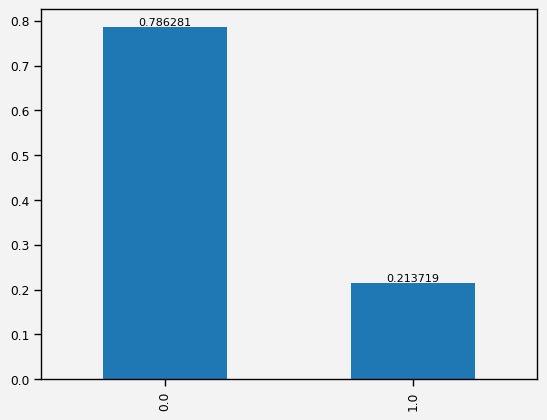

In [ ]:
# Training
ax = training['target'].value_counts(normalize=True).plot(kind='bar')

plt.gcf().set_facecolor('#f3f3f3ff')
ax.set_facecolor('#f3f3f3ff')

ax.bar_label(ax.containers[0])

plt.show()

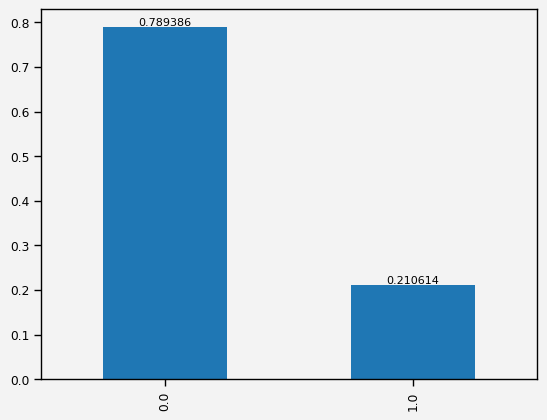

In [ ]:
# Test
ax = test['target'].value_counts(normalize=True).plot(kind='bar')

plt.gcf().set_facecolor('#f3f3f3ff')
ax.set_facecolor('#f3f3f3ff')

ax.bar_label(ax.containers[0])

plt.show()

## Feature Check Using Boxplots and Heatmaps

In [ ]:
x_training

,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,age,...,customer_value_level_A,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E,generation_Boomer,generation_Gen X,generation_Millennial,generation_Gen Z,generation_Gen Alpha
account_id,,,,,,,,,,,,,,,,,,,,,
100638029,54.0,0,11250.0,4,10000.0,1,10000.0,12,6,34,...,0,1,0,0,0,0,0,1,0,0
100786007,125.0,0,10000.0,2,10000.0,1,10000.0,16,4,58,...,1,0,0,0,0,0,1,0,0,0
100136859,29.0,1,15750.0,4,18000.0,1,20000.0,15,6,52,...,0,1,0,0,0,0,1,0,0,0
100142213,99.0,0,18000.0,3,18000.0,3,20000.0,16,7,43,...,0,0,0,0,1,0,1,0,0,0
100434021,18.0,1,15000.0,1,15000.0,1,15000.0,18,3,48,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100749351,126.0,0,10000.0,2,10000.0,1,10000.0,14,4,78,...,0,0,0,0,1,1,0,0,0,0
100177744,72.0,1,5000.0,4,5000.0,3,5000.0,18,5,45,...,0,0,0,1,0,0,1,0,0,0
100685632,79.0,1,10500.0,4,9000.0,3,10000.0,15,6,56,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
binary_columns = []

for col in training.columns:
  if training[col].nunique() == 2:
    binary_columns.append(col)

binary_columns.remove('target')
binary_columns

['flag_female',
 'account_activity_level_X',
 'account_activity_level_Y',
 'account_activity_level_Z',
 'customer_value_level_A',
 'customer_value_level_B',
 'customer_value_level_C',
 'customer_value_level_D',
 'customer_value_level_E',
 'generation_Boomer',
 'generation_Gen X',
 'generation_Millennial',
 'generation_Gen Z',
 'generation_Gen Alpha']

In [ ]:
training

,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,age,...,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E,generation_Boomer,generation_Gen X,generation_Millennial,generation_Gen Z,generation_Gen Alpha,target
account_id,,,,,,,,,,,,,,,,,,,,,
100638029,54.0,0,11250.0,4,10000.0,1,10000.0,12,6,34,...,1,0,0,0,0,0,1,0,0,0.0
100786007,125.0,0,10000.0,2,10000.0,1,10000.0,16,4,58,...,0,0,0,0,0,1,0,0,0,0.0
100136859,29.0,1,15750.0,4,18000.0,1,20000.0,15,6,52,...,1,0,0,0,0,1,0,0,0,0.0
100142213,99.0,0,18000.0,3,18000.0,3,20000.0,16,7,43,...,0,0,0,1,0,1,0,0,0,0.0
100434021,18.0,1,15000.0,1,15000.0,1,15000.0,18,3,48,...,0,0,0,1,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100749351,126.0,0,10000.0,2,10000.0,1,10000.0,14,4,78,...,0,0,0,1,1,0,0,0,0,1.0
100177744,72.0,1,5000.0,4,5000.0,3,5000.0,18,5,45,...,0,0,1,0,0,1,0,0,0,0.0
100685632,79.0,1,10500.0,4,9000.0,3,10000.0,15,6,56,...,0,0,1,0,0,1,0,0,0,0.0


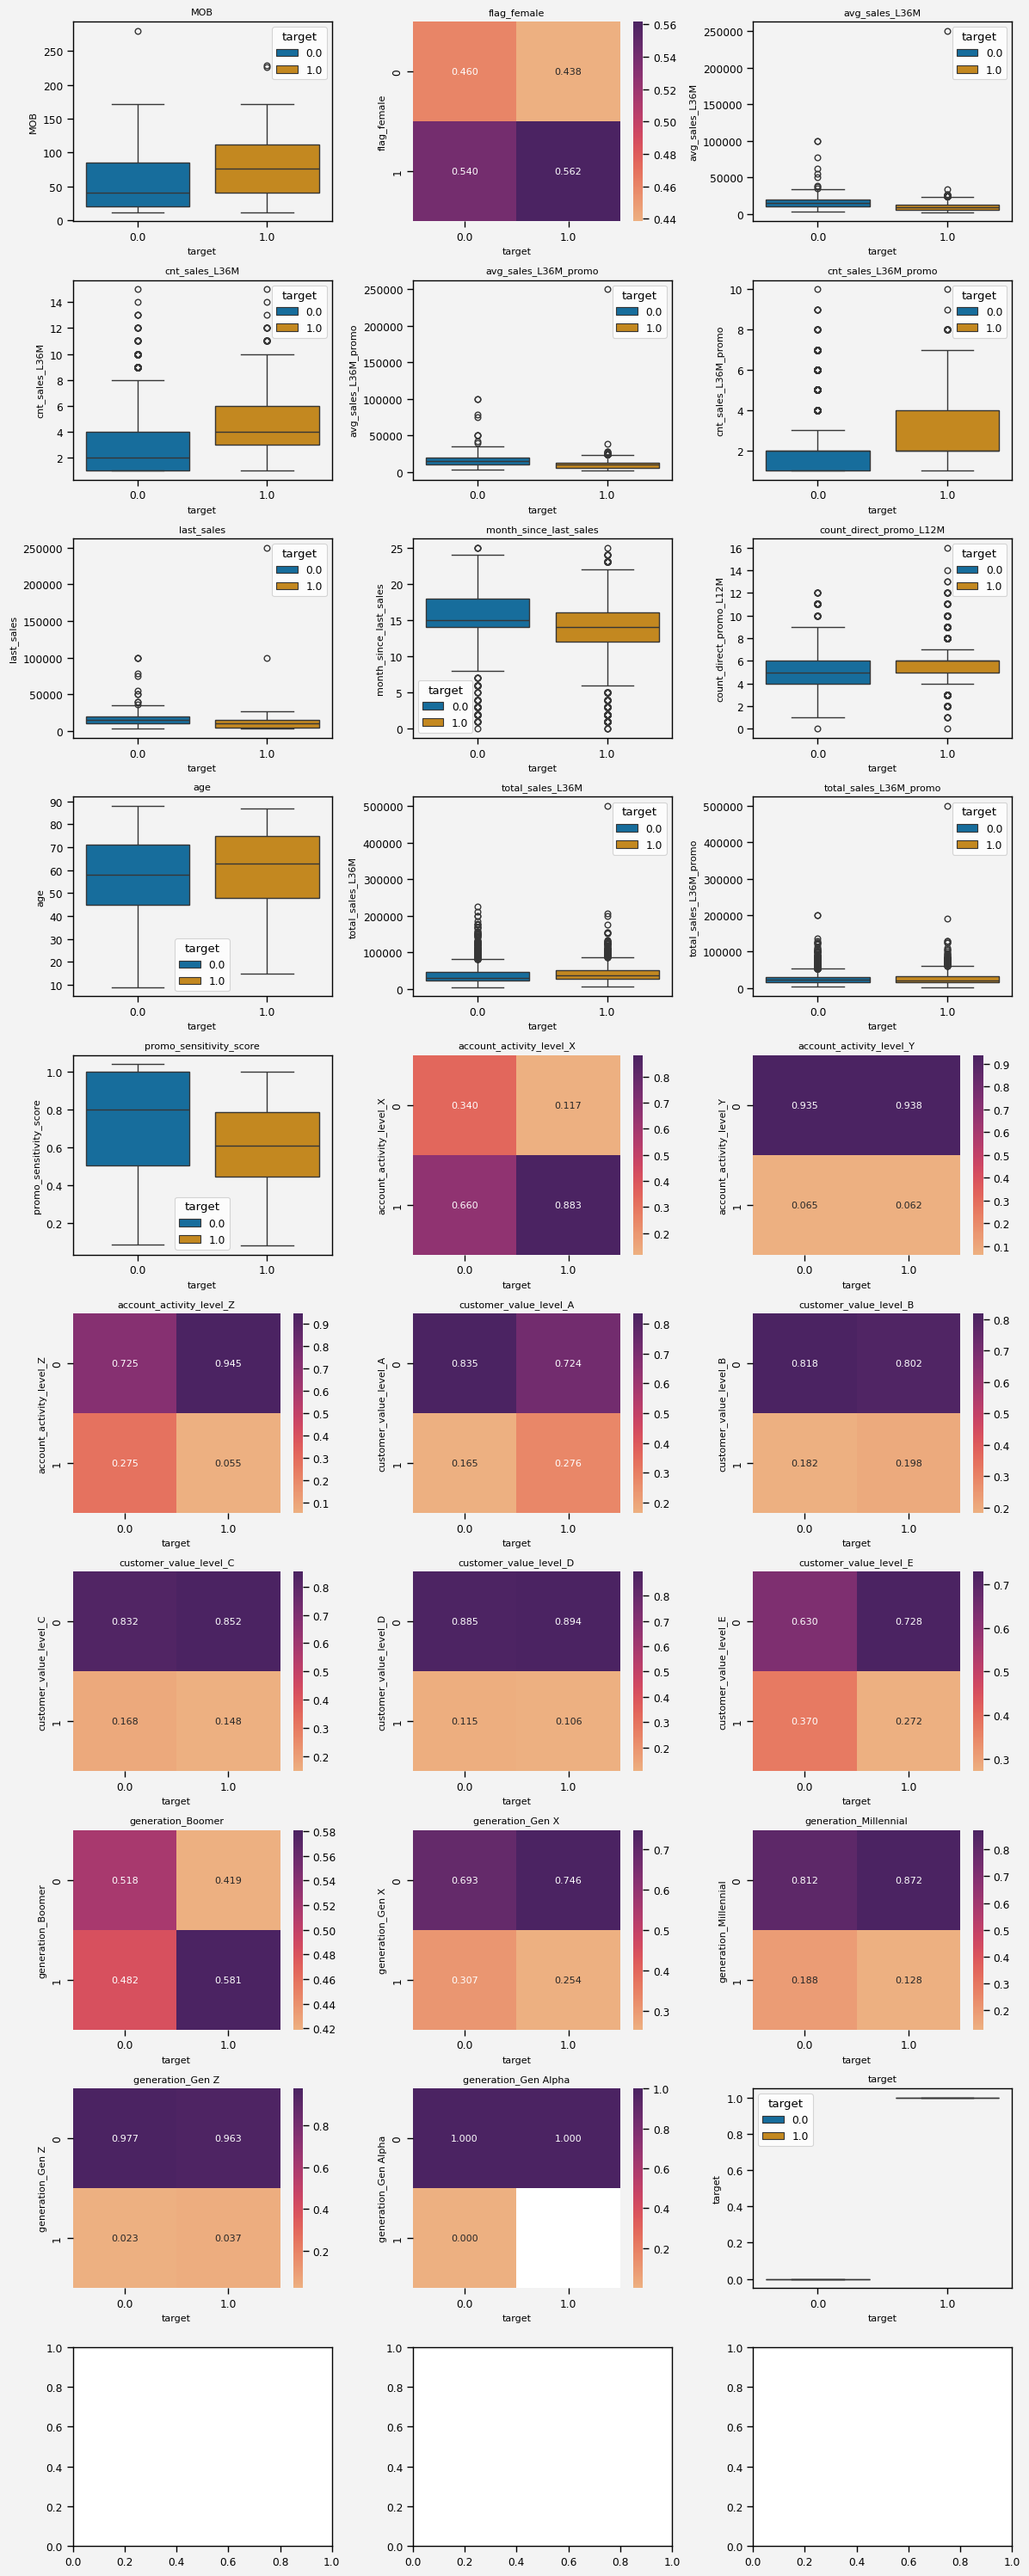

In [ ]:
fig, axes = plt.subplots(10, 3, figsize=(12, 30))

sns.set_context("paper", rc={"font.size": 8, "axes.titlesize": 8, "axes.labelsize": 8})

fig.set_facecolor('#f3f3f3ff')

for index, col in enumerate(training.columns):
    # Check if the column is binary
    if col in binary_columns:
        data = training[['target', col]].groupby('target').value_counts(normalize=True).reset_index(name="value")
        data = data.pivot(columns='target', index=col, values='value')
        sns.heatmap(data, annot=True, fmt=",.3f", ax=axes.flatten()[index], cmap='flare')

    else:
        axes.flatten()[index].set_facecolor('#f3f3f3ff')
        sns.boxplot(data=training, x='target', y=col, hue='target', ax=axes.flatten()[index], palette='colorblind')

    axes.flatten()[index].set_title(col)

plt.tight_layout()
plt.show()

# Variable Removal Using Correlation

In [ ]:
# Check correlation of features
corr_column = training.select_dtypes(include='number').columns

# Some people may want to check correlation of variables against target
# In that case, leave this code commented.
# corr_column = list(set(corr_column) - set(target_column))

corr_column

Index(['MOB', 'flag_female', 'avg_sales_L36M', 'cnt_sales_L36M',
       'avg_sales_L36M_promo', 'cnt_sales_L36M_promo', 'last_sales',
       'month_since_last_sales', 'count_direct_promo_L12M', 'age',
       'total_sales_L36M', 'total_sales_L36M_promo', 'promo_sensitivity_score',
       'account_activity_level_X', 'account_activity_level_Y',
       'account_activity_level_Z', 'customer_value_level_A',
       'customer_value_level_B', 'customer_value_level_C',
       'customer_value_level_D', 'customer_value_level_E', 'generation_Boomer',
       'generation_Gen X', 'generation_Millennial', 'generation_Gen Z',
       'generation_Gen Alpha', 'target'],
      dtype='object')

In [ ]:
training[corr_column].corr()

,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,age,...,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E,generation_Boomer,generation_Gen X,generation_Millennial,generation_Gen Z,generation_Gen Alpha,target
MOB,1.000000,0.036091,-0.322480,0.355887,-0.312665,0.239585,-0.308948,-0.037055,2.419833e-01,0.262881,...,-0.031759,0.003868,-0.014174,5.615582e-02,0.224085,-0.106132,-0.167244,0.000092,-0.007172,0.227321
flag_female,0.036091,1.000000,-0.052310,0.044199,-0.053127,0.031312,-0.047363,-0.001921,-1.277242e-02,-0.044887,...,-0.014643,-0.000063,0.011684,6.468282e-03,-0.050227,0.003808,0.053962,0.019690,-0.016835,0.017720
avg_sales_L36M,-0.322480,-0.052310,1.000000,-0.512113,0.975147,-0.379102,0.958678,0.152634,-1.035449e-01,-0.106474,...,0.044201,-0.017170,0.002932,-8.555269e-02,-0.119305,0.091888,0.060177,-0.032121,-0.000537,-0.312701
cnt_sales_L36M,0.355887,0.044199,-0.512113,1.000000,-0.498474,0.833102,-0.487432,-0.178896,4.593008e-01,0.081921,...,-0.041338,-0.004990,0.005610,6.455245e-02,0.088230,-0.070335,-0.054632,0.055606,-0.008784,0.373357
avg_sales_L36M_promo,-0.312665,-0.053127,0.975147,-0.498474,1.000000,-0.363939,0.926412,0.146236,-9.406448e-02,-0.101838,...,0.046359,-0.014131,0.001683,-8.720958e-02,-0.112004,0.081677,0.061642,-0.029312,-0.000296,-0.299310
cnt_sales_L36M_promo,0.239585,0.031312,-0.379102,0.833102,-0.363939,1.000000,-0.367547,-0.083357,3.838446e-01,0.038818,...,-0.025371,-0.005938,0.005570,3.454225e-02,0.046843,-0.044343,-0.029936,0.051433,-0.000986,0.275754
last_sales,-0.308948,-0.047363,0.958678,-0.487432,0.926412,-0.367547,1.000000,0.147254,-6.717901e-02,-0.108993,...,0.041201,-0.017685,0.002870,-8.071318e-02,-0.123192,0.099249,0.057357,-0.034268,-0.000657,-0.308168
month_since_last_sales,-0.037055,-0.001921,0.152634,-0.178896,0.146236,-0.083357,0.147254,1.000000,-2.356859e-01,-0.054662,...,0.001458,-0.003857,0.036296,-1.162888e-02,-0.049107,0.019848,0.046180,-0.011763,-0.010975,-0.252603
count_direct_promo_L12M,0.241983,-0.012772,-0.103545,0.459301,-0.094064,0.383845,-0.067179,-0.235686,1.000000e+00,0.066102,...,-0.007488,-0.006759,0.002230,-9.573313e-07,0.061888,-0.027296,-0.041059,-0.018925,0.007809,0.176749
age,0.262881,-0.044887,-0.106474,0.081921,-0.101838,0.038818,-0.108993,-0.054662,6.610220e-02,1.000000,...,-0.028696,0.006828,-0.033091,3.270032e-02,0.852428,-0.297721,-0.612284,-0.358477,-0.045164,0.073763


Visualization Using Heatmap

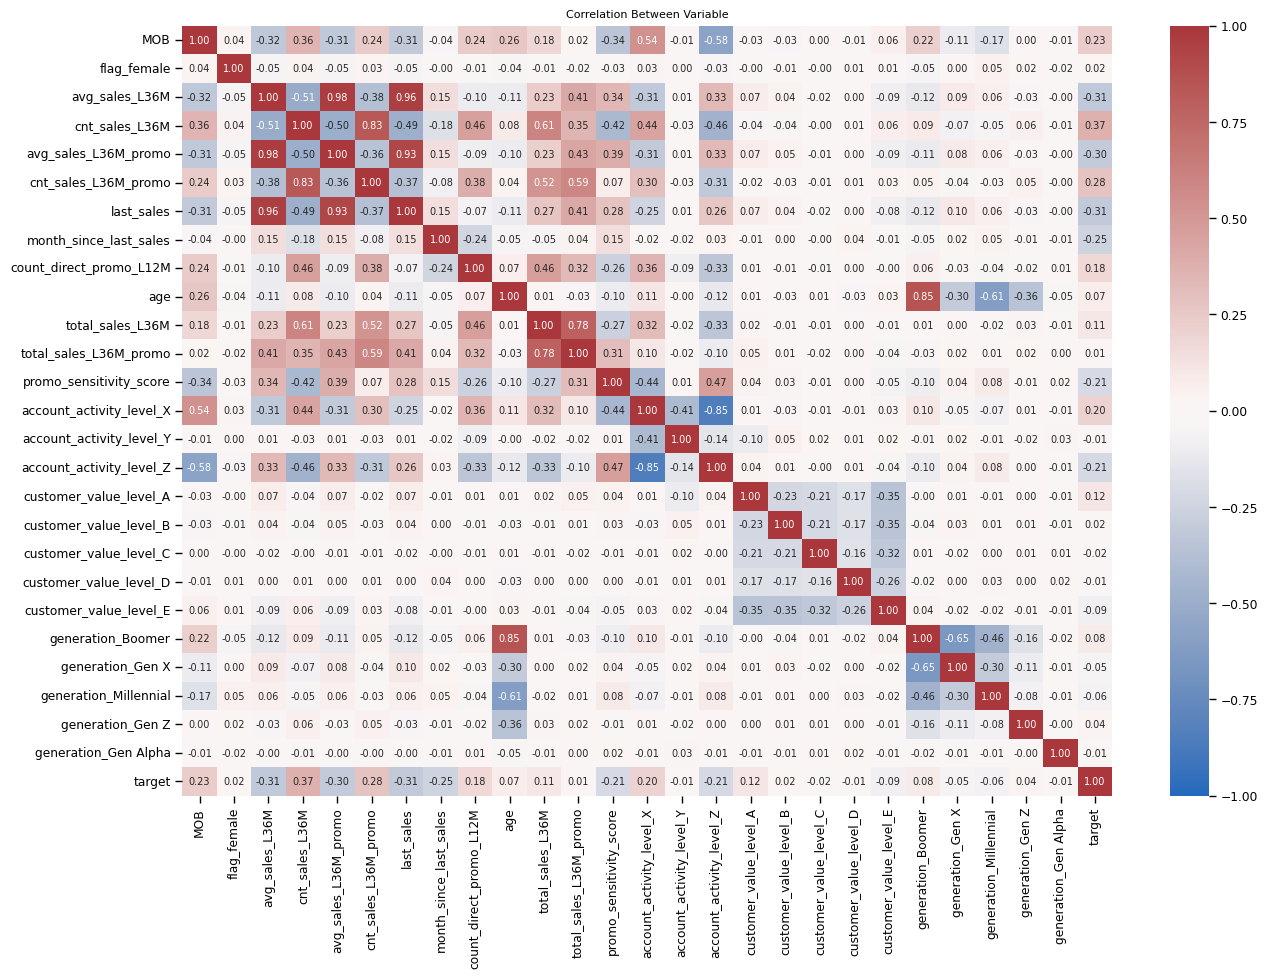

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

ax.set_title('Correlation Between Variable')

sns.heatmap(training[corr_column].corr(),
            vmin=-1, #nilai min heatmap
            vmax=1, #nilai max heatmap
            cmap='vlag', #warna
            annot=True, #beri label
            annot_kws={"fontsize":7}, #fontsize label
            fmt=",.2f" #format angka di label
            )

plt.show()

We will remove the variables in which:
* have strong correlation with other features (<-0.5 or >0.5)
* have low correlation with 'target'

In [ ]:
remove_variables_high_features = ['MOB', 'avg_sales_L36M', 'cnt_sales_L36M', 'last_sales', 'total_sales_L36M',
                                  'total_sales_L36M_promo', 'promo_sensitivity_score', 'account_activity_level_Z',
                                  'generation_Boomer', 'generation_Millennial']
remove_variables_low_target = ['account_activity_level_Y']

In [ ]:
remove_variables_corr = list(set(remove_variables_high_features + remove_variables_low_target))
remove_variables_corr

['total_sales_L36M',
 'avg_sales_L36M',
 'cnt_sales_L36M',
 'MOB',
 'account_activity_level_Z',
 'promo_sensitivity_score',
 'generation_Boomer',
 'total_sales_L36M_promo',
 'account_activity_level_Y',
 'generation_Millennial',
 'last_sales']

In [ ]:
x_training_model = x_training.drop(remove_variables_corr, axis=1)
x_test_model = x_test.drop(remove_variables_corr, axis=1)

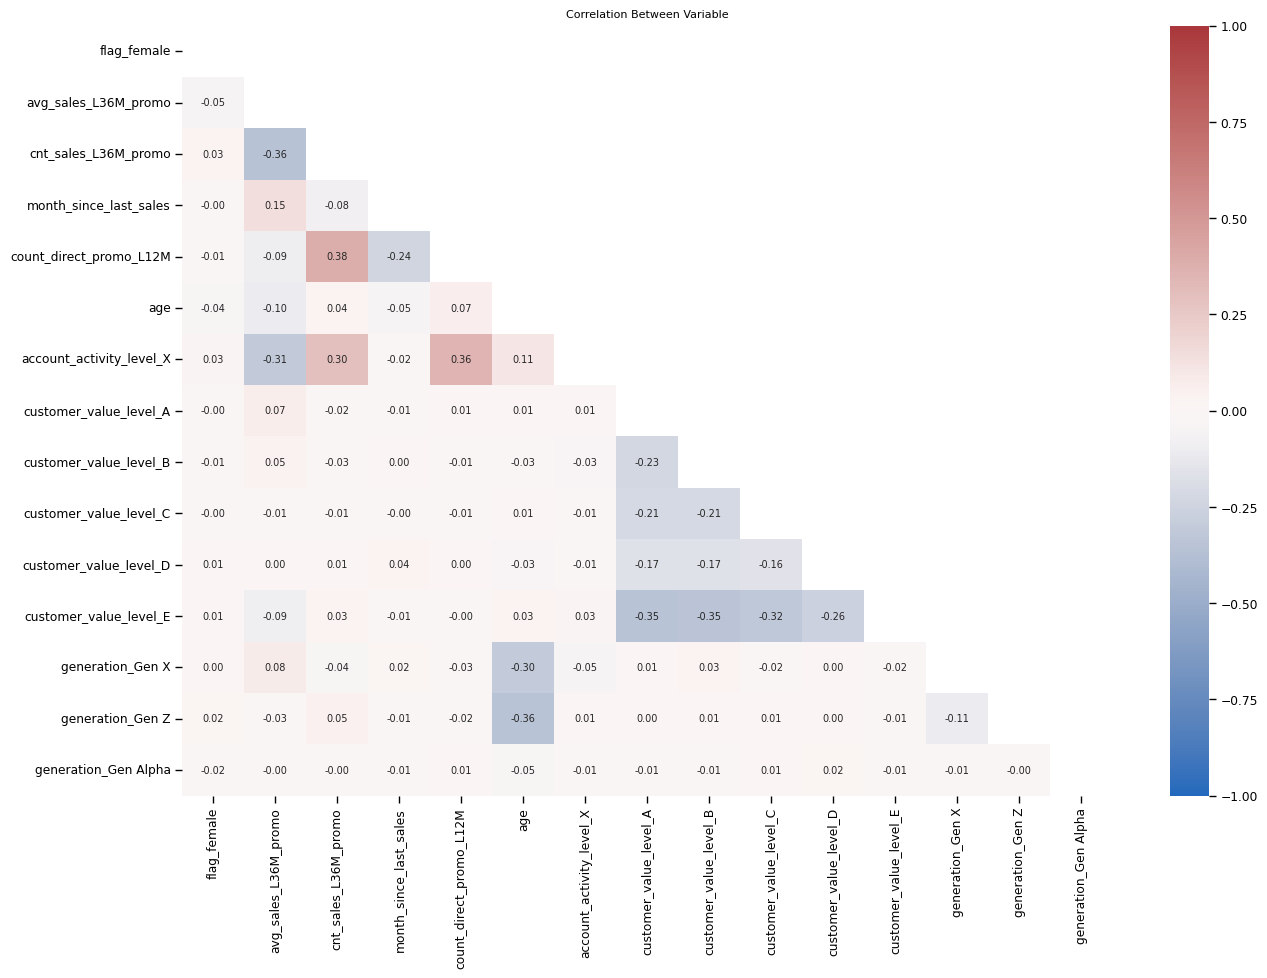

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

ax.set_title('Correlation Between Variable')

mask = np.triu(np.ones_like(
    x_training_model.corr(), dtype=bool))

sns.heatmap(x_training_model.corr(),
            vmin=-1, #nilai min heatmap
            vmax=1, #nilai max heatmap
            cmap='vlag', #warna
            annot=True, #beri label
            mask=mask, #masking tadi ditaruh di sini
            annot_kws={"fontsize":7}, #fontsize label
            fmt=",.2f" #format angka di label
            )

plt.show()

In [ ]:
x_training_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8441 entries, 100638029 to 100023975
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   flag_female               8441 non-null   int64  
 1   avg_sales_L36M_promo      8441 non-null   float64
 2   cnt_sales_L36M_promo      8441 non-null   int64  
 3   month_since_last_sales    8441 non-null   int64  
 4   count_direct_promo_L12M   8441 non-null   int64  
 5   age                       8441 non-null   int64  
 6   account_activity_level_X  8441 non-null   uint8  
 7   customer_value_level_A    8441 non-null   uint8  
 8   customer_value_level_B    8441 non-null   uint8  
 9   customer_value_level_C    8441 non-null   uint8  
 10  customer_value_level_D    8441 non-null   uint8  
 11  customer_value_level_E    8441 non-null   uint8  
 12  generation_Gen X          8441 non-null   uint8  
 13  generation_Gen Z          8441 non-null   uint8  


# Model Training & Application to Test Set

In [ ]:
model = LogisticRegression(class_weight='balanced', max_iter=500)
model.fit(x_training_model, y_training)

LogisticRegression(class_weight='balanced', max_iter=500)

# Probability and Prediction of the Model

In [ ]:
x_training_model

,flag_female,avg_sales_L36M_promo,cnt_sales_L36M_promo,month_since_last_sales,count_direct_promo_L12M,age,account_activity_level_X,customer_value_level_A,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E,generation_Gen X,generation_Gen Z,generation_Gen Alpha
account_id,,,,,,,,,,,,,,,
100638029,0,10000.0,1,12,6,34,1,0,1,0,0,0,0,0,0
100786007,0,10000.0,1,16,4,58,1,1,0,0,0,0,1,0,0
100136859,1,18000.0,1,15,6,52,1,0,1,0,0,0,1,0,0
100142213,0,18000.0,3,16,7,43,0,0,0,0,0,1,1,0,0
100434021,1,15000.0,1,18,3,48,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100749351,0,10000.0,1,14,4,78,1,0,0,0,0,1,0,0,0
100177744,1,5000.0,3,18,5,45,1,0,0,0,1,0,1,0,0
100685632,1,9000.0,3,15,6,56,1,0,0,0,1,0,1,0,0


In [ ]:
model.predict(x_training_model)

array([1., 0., 0., ..., 1., 1., 0.])

In [ ]:
model.predict_proba(x_training_model)

array([[0.46538701, 0.53461299],
       [0.63210482, 0.36789518],
       [0.70122535, 0.29877465],
       ...,
       [0.33233374, 0.66766626],
       [0.33243384, 0.66756616],
       [0.5095337 , 0.4904663 ]])

In [ ]:
x_training2 = x_training_model.copy()

x_training2['prediction'] = model.predict(x_training_model)

x_training2[['prob_no','prob_takers']] = model.predict_proba(x_training_model)

x_training2[['prob_takers','prediction']]

,prob_takers,prediction
account_id,,
100638029,0.534613,1.0
100786007,0.367895,0.0
100136859,0.298775,0.0
100142213,0.399690,0.0
100434021,0.133766,0.0
...,...,...
100749351,0.440467,0.0
100177744,0.607819,1.0
100685632,0.667666,1.0


In [ ]:
# Filter the DataFrame to include only rows where prediction is 1.0
prediction_x = x_training2[x_training2['prediction'] == 1.0]

# Count the number of rows in the filtered DataFrame
count_prediction_x = len(prediction_x)

print("Number of account_id with prediction = 1:", count_prediction_x)

Number of account_id with prediction = 1: 3256


In [ ]:
x_test2 = x_test_model.copy()
x_test2['prediction'] = model.predict(x_test_model)
x_test2[['prob_no','prob_takers']] = model.predict_proba(x_test_model)
x_test2[['prob_takers','prediction']]

,prob_takers,prediction
account_id,,
100158635,0.619895,1.0
100025376,0.689058,1.0
100266214,0.881349,1.0
100598155,0.188807,0.0
100895809,0.572642,1.0
...,...,...
101034497,0.790254,1.0
101005076,0.115742,0.0
100885175,0.686913,1.0


In [ ]:
# Filter the DataFrame to include only rows where prediction is 1.0
prediction_1 = x_test2[x_test2['prediction'] == 1.0]

# Count the number of rows in the filtered DataFrame
count_prediction_1 = len(prediction_1)

print("Number of account_id with prediction = 1:", count_prediction_1)

Number of account_id with prediction = 1: 1377


# Model Evaluation

## Accuracy

In [ ]:
model.score(x_training_model, y_training)

0.7144888046439996

In [ ]:
model.score(x_test_model, y_test)

0.7227750138197899

## Confusion Matrix

In [ ]:
confusion_train = confusion_matrix(y_training, model.predict(x_training_model))
confusion_train

array([[4706, 1931],
       [ 479, 1325]])

Text(49.91666666666667, 0.5, 'True labels')

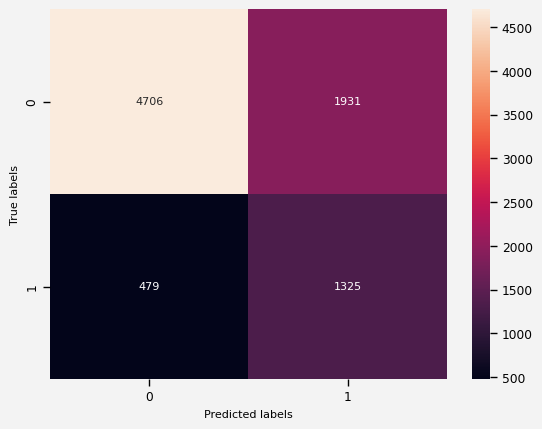

In [ ]:
sns.heatmap(confusion_train, annot=True, fmt='d')
plt.gcf().set_facecolor('#f3f3f3ff')
plt.gca().set_facecolor('#f3f3f3ff')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

Text(49.91666666666667, 0.5, 'True labels')

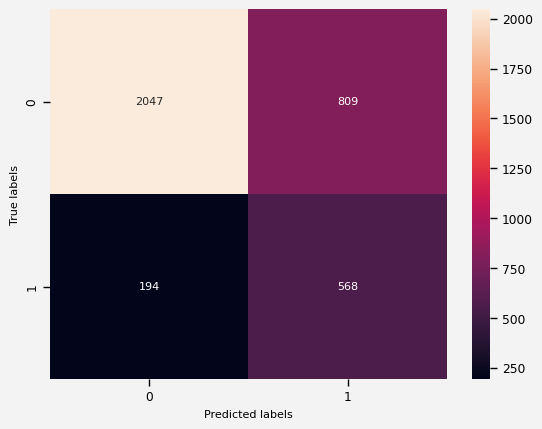

In [ ]:
confusion_test = confusion_matrix(y_test, model.predict(x_test_model))

sns.heatmap(confusion_test, annot=True, fmt = 'd')
plt.gcf().set_facecolor('#f3f3f3ff')
plt.gca().set_facecolor('#f3f3f3ff')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

In [ ]:
#accuracy
(2047+568)/(2047+809+194+568)

0.7227750138197899

## Classification Report


In [ ]:
y_predict = model.predict(x_training_model)
print(classification_report(y_training, y_predict))

              precision    recall  f1-score   support

         0.0       0.91      0.71      0.80      6637
         1.0       0.41      0.73      0.52      1804

    accuracy                           0.71      8441
   macro avg       0.66      0.72      0.66      8441
weighted avg       0.80      0.71      0.74      8441



In [ ]:
print(classification_report(y_test, model.predict(x_test_model)))

              precision    recall  f1-score   support

         0.0       0.91      0.72      0.80      2856
         1.0       0.41      0.75      0.53       762

    accuracy                           0.72      3618
   macro avg       0.66      0.73      0.67      3618
weighted avg       0.81      0.72      0.75      3618



## AUC-ROC Curve

In [ ]:
model.predict_proba(x_training_model)

array([[0.46538701, 0.53461299],
       [0.63210482, 0.36789518],
       [0.70122535, 0.29877465],
       ...,
       [0.33233374, 0.66766626],
       [0.33243384, 0.66756616],
       [0.5095337 , 0.4904663 ]])

In [ ]:
model.predict_proba(x_training_model)[:, 1]

array([0.53461299, 0.36789518, 0.29877465, ..., 0.66766626, 0.66756616,
       0.4904663 ])

In [ ]:
y_train_score = model.predict_proba(x_training_model)[:,1]
y_test_score = model.predict_proba(x_test_model)[:,1]
y_train_score

array([0.53461299, 0.36789518, 0.29877465, ..., 0.66766626, 0.66756616,
       0.4904663 ])

In [ ]:
# Get ROC detail of training and testing data
fpr_train, tpr_train, _ = roc_curve(y_training, y_train_score)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_score)

# Get AUC detail of training and testing
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

In [ ]:
print(auc_train)

0.7927599742356813


In [ ]:
print(auc_test)

0.7984121470110355


In [ ]:
# Menghitung Gini dari AUC
# Rumusnya adalah 2*(nilai AUC - 0.5)
gini_train = 2*(auc_train - 0.5)
gini_test = 2*(auc_test - 0.5)

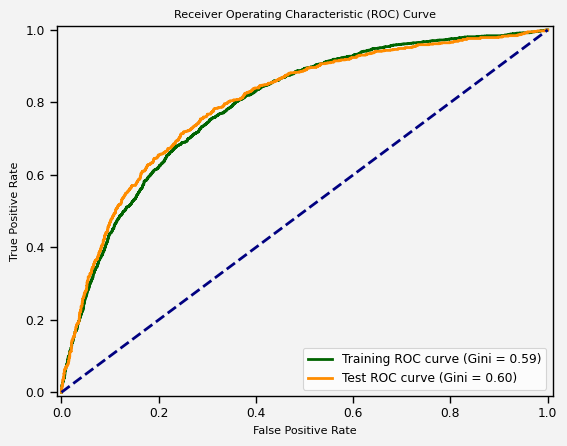

In [ ]:
plt.figure(facecolor='#f3f3f3ff')

# Training
plt.plot(
    fpr_train, #FPR sbg x-axis
    tpr_train, #TPR sbg y-axis
    color = "darkgreen",
    lw=2, #linewidth
    label=f"Training ROC curve (Gini = {gini_train:.2f})",
)

# Testing
plt.plot(
    fpr_test,
    tpr_test,
    color = "darkorange",
    lw=2,
    label=f"Test ROC curve (Gini = {gini_test:.2f})",
)

plt.plot([0,1],[0,1], color="navy", lw=2, linestyle = '--')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")

plt.gca().set_facecolor('#f3f3f3ff')

plt.legend(loc="lower right")
plt.show()

## Decile Performance


In [ ]:
x_training3 = x_training_model.copy()
x_training3['prediction'] = model.predict(x_training_model)
x_training3[['prob_no','prob_takers']] = model.predict_proba(x_training_model)
x_training3 = x_training3[['prob_takers','prediction']].copy()
x_training3

,prob_takers,prediction
account_id,,
100638029,0.534613,1.0
100786007,0.367895,0.0
100136859,0.298775,0.0
100142213,0.399690,0.0
100434021,0.133766,0.0
...,...,...
100749351,0.440467,0.0
100177744,0.607819,1.0
100685632,0.667666,1.0


In [ ]:
y_training

account_id
100638029    0.0
100786007    0.0
100136859    0.0
100142213    0.0
100434021    0.0
            ... 
100749351    1.0
100177744    0.0
100685632    0.0
100458549    1.0
100023975    1.0
Name: target, Length: 8441, dtype: float64

In [ ]:
x_training3 = x_training3.merge(y_training, how='inner', left_index=True, right_index=True)
x_training3

,prob_takers,prediction,target
account_id,,,
100638029,0.534613,1.0,0.0
100786007,0.367895,0.0,0.0
100136859,0.298775,0.0,0.0
100142213,0.399690,0.0,0.0
100434021,0.133766,0.0,0.0
...,...,...,...
100749351,0.440467,0.0,1.0
100177744,0.607819,1.0,0.0
100685632,0.667666,1.0,0.0


In [ ]:
x_training3['prob_takers'].median()

0.405408940469639

In [ ]:
x_training3['prob_takers'].mean()

0.4248342160096692

In [ ]:
pd.qcut(x_training3['prob_takers'], q=10, precision=5)

account_id
100638029    (0.48849, 0.56906]
100786007    (0.32272, 0.40541]
100136859    (0.24923, 0.32272]
100142213    (0.32272, 0.40541]
100434021    (0.12459, 0.18218]
                    ...        
100749351    (0.40541, 0.48849]
100177744    (0.56906, 0.66176]
100685632    (0.66176, 0.76421]
100458549    (0.66176, 0.76421]
100023975    (0.48849, 0.56906]
Name: prob_takers, Length: 8441, dtype: category
Categories (10, interval[float64, right]): [(-9.999997168600002e-06, 0.12459] < (0.12459, 0.18218] <
                                            (0.18218, 0.24923] < (0.24923, 0.32272] < ... <
                                            (0.48849, 0.56906] < (0.56906, 0.66176] <
                                            (0.66176, 0.76421] < (0.76421, 0.99687]]

In [ ]:
x_training3['binning'] = pd.qcut(x_training3['prob_takers'], q=10, precision=5)
x_training3

,prob_takers,prediction,target,binning
account_id,,,,
100638029,0.534613,1.0,0.0,"(0.48849, 0.56906]"
100786007,0.367895,0.0,0.0,"(0.32272, 0.40541]"
100136859,0.298775,0.0,0.0,"(0.24923, 0.32272]"
100142213,0.399690,0.0,0.0,"(0.32272, 0.40541]"
100434021,0.133766,0.0,0.0,"(0.12459, 0.18218]"
...,...,...,...,...
100749351,0.440467,0.0,1.0,"(0.40541, 0.48849]"
100177744,0.607819,1.0,0.0,"(0.56906, 0.66176]"
100685632,0.667666,1.0,0.0,"(0.66176, 0.76421]"


In [ ]:
x_training4 = x_training3.drop(['prob_takers','prediction'], axis=1).value_counts().sort_index(ascending=False)
x_training4

target  binning                          
1.0     (0.76421, 0.99687]                   495
        (0.66176, 0.76421]                   386
        (0.56906, 0.66176]                   263
        (0.48849, 0.56906]                   211
        (0.40541, 0.48849]                   157
        (0.32272, 0.40541]                   110
        (0.24923, 0.32272]                    81
        (0.18218, 0.24923]                    44
        (0.12459, 0.18218]                    28
        (-9.999997168600002e-06, 0.12459]     29
0.0     (0.76421, 0.99687]                   349
        (0.66176, 0.76421]                   458
        (0.56906, 0.66176]                   581
        (0.48849, 0.56906]                   633
        (0.40541, 0.48849]                   687
        (0.32272, 0.40541]                   733
        (0.24923, 0.32272]                   764
        (0.18218, 0.24923]                   800
        (0.12459, 0.18218]                   816
        (-9.999997168600002

In [ ]:
x_training4.unstack()

binning,"(-9.999997168600002e-06, 0.12459]","(0.12459, 0.18218]","(0.18218, 0.24923]","(0.24923, 0.32272]","(0.32272, 0.40541]","(0.40541, 0.48849]","(0.48849, 0.56906]","(0.56906, 0.66176]","(0.66176, 0.76421]","(0.76421, 0.99687]"
target,,,,,,,,,,
0.0,816,816,800,764,733,687,633,581,458,349
1.0,29,28,44,81,110,157,211,263,386,495


In [ ]:
x_training4.unstack().T

target,0.0,1.0
binning,,
"(-9.999997168600002e-06, 0.12459]",816,29
"(0.12459, 0.18218]",816,28
"(0.18218, 0.24923]",800,44
"(0.24923, 0.32272]",764,81
"(0.32272, 0.40541]",733,110
"(0.40541, 0.48849]",687,157
"(0.48849, 0.56906]",633,211
"(0.56906, 0.66176]",581,263
"(0.66176, 0.76421]",458,386


In [ ]:
df_prop = x_training4.unstack().T.fillna(0)

df_prop.columns = ['actual_#non_takers', 'actual_#takers']

df_prop

,actual_#non_takers,actual_#takers
binning,,
"(-9.999997168600002e-06, 0.12459]",816,29
"(0.12459, 0.18218]",816,28
"(0.18218, 0.24923]",800,44
"(0.24923, 0.32272]",764,81
"(0.32272, 0.40541]",733,110
"(0.40541, 0.48849]",687,157
"(0.48849, 0.56906]",633,211
"(0.56906, 0.66176]",581,263
"(0.66176, 0.76421]",458,386


In [ ]:
df_prop['total_obs'] = df_prop['actual_#non_takers'] + df_prop['actual_#takers']

# probability actual takers
df_prop['prob_takers'] = df_prop['actual_#takers']/df_prop['total_obs']

# proporsi dari actual non-taker dan taker dr keseluruhan orang di masing-masing kategori
# total semua orang per kategori
nontakers = df_prop['actual_#non_takers'].sum()
takers = df_prop['actual_#takers'].sum()

# make new column
df_prop['%non_takers'] = df_prop['actual_#non_takers']/nontakers
df_prop['%takers'] = df_prop['actual_#takers']/takers
df_prop

,actual_#non_takers,actual_#takers,total_obs,prob_takers,%non_takers,%takers
binning,,,,,,
"(-9.999997168600002e-06, 0.12459]",816,29,845,0.034320,0.122947,0.016075
"(0.12459, 0.18218]",816,28,844,0.033175,0.122947,0.015521
"(0.18218, 0.24923]",800,44,844,0.052133,0.120536,0.024390
"(0.24923, 0.32272]",764,81,845,0.095858,0.115112,0.044900
"(0.32272, 0.40541]",733,110,843,0.130486,0.110441,0.060976
"(0.40541, 0.48849]",687,157,844,0.186019,0.103511,0.087029
"(0.48849, 0.56906]",633,211,844,0.250000,0.095374,0.116962
"(0.56906, 0.66176]",581,263,844,0.311611,0.087540,0.145787
"(0.66176, 0.76421]",458,386,844,0.457346,0.069007,0.213969


In [ ]:
df_prop['cumm%_non_takers'] = df_prop['%non_takers'].cumsum()
df_prop['cumm%_takers'] = df_prop['%takers'].cumsum()

df_prop

,actual_#non_takers,actual_#takers,total_obs,prob_takers,%non_takers,%takers,cumm%_non_takers,cumm%_takers
binning,,,,,,,,
"(-9.999997168600002e-06, 0.12459]",816,29,845,0.034320,0.122947,0.016075,0.122947,0.016075
"(0.12459, 0.18218]",816,28,844,0.033175,0.122947,0.015521,0.245894,0.031596
"(0.18218, 0.24923]",800,44,844,0.052133,0.120536,0.024390,0.366431,0.055987
"(0.24923, 0.32272]",764,81,845,0.095858,0.115112,0.044900,0.481543,0.100887
"(0.32272, 0.40541]",733,110,843,0.130486,0.110441,0.060976,0.591984,0.161863
"(0.40541, 0.48849]",687,157,844,0.186019,0.103511,0.087029,0.695495,0.248891
"(0.48849, 0.56906]",633,211,844,0.250000,0.095374,0.116962,0.790869,0.365854
"(0.56906, 0.66176]",581,263,844,0.311611,0.087540,0.145787,0.878409,0.511641
"(0.66176, 0.76421]",458,386,844,0.457346,0.069007,0.213969,0.947416,0.725610


In [ ]:
(581+458+349)/(3*844)

0.5481832543443917

ambil probability di atas 0.569 (top 3 aja)

## Kolmogorov-Smirnov Statistics (KS Statistics)

In [ ]:
df_prop['cumm%_non_takers'] - df_prop['cumm%_takers']

binning
(-9.999997168600002e-06, 0.12459]    0.106872
(0.12459, 0.18218]                   0.214298
(0.18218, 0.24923]                   0.310444
(0.24923, 0.32272]                   0.380656
(0.32272, 0.40541]                   0.430122
(0.40541, 0.48849]                   0.446604
(0.48849, 0.56906]                   0.425016
(0.56906, 0.66176]                   0.366768
(0.66176, 0.76421]                   0.221806
(0.76421, 0.99687]                   0.000000
dtype: float64

In [ ]:
ks_statistics = 100*(df_prop['cumm%_non_takers'] - df_prop['cumm%_takers']).max()
ks_statistics

44.660359998890854

# Benefit-Cost Analysis

In [ ]:
paylater_users = pd.concat([x_test2[['prob_takers','prediction']],x_training2[['prob_takers','prediction']]])
paylater_users.sort_index()

,prob_takers,prediction
account_id,,
100000038,0.690768,1.0
100000382,0.520071,1.0
100000453,0.428501,0.0
100000472,0.264527,0.0
100000612,0.412956,0.0
...,...,...
101059893,0.159333,0.0
101059900,0.138838,0.0
101059935,0.094540,0.0


In [ ]:
paylater_users = df_xsell.merge(paylater_users, how = 'right', left_on='account_id', right_on='account_id')
paylater_users

,account_id,xsell_success,xsell_sales,xsell_count,prob_takers,prediction
0,100158635,0,NaN,0.0,0.619895,1.0
1,100025376,1,8000.0,3.0,0.689058,1.0
2,100266214,0,NaN,0.0,0.881349,1.0
3,100598155,0,NaN,0.0,0.188807,0.0
4,100895809,0,NaN,0.0,0.572642,1.0
...,...,...,...,...,...,...
12054,100749351,1,13000.0,1.0,0.440467,0.0
12055,100177744,0,NaN,0.0,0.607819,1.0
12056,100685632,0,NaN,0.0,0.667666,1.0
12057,100458549,1,9000.0,2.0,0.667566,1.0


In [ ]:
paylater_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12059 entries, 0 to 12058
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   account_id     12059 non-null  int64  
 1   xsell_success  12059 non-null  int64  
 2   xsell_sales    2566 non-null   float64
 3   xsell_count    12059 non-null  float64
 4   prob_takers    12059 non-null  float64
 5   prediction     12059 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 659.5 KB


In [ ]:
paylater_users['xsell_sales'] = paylater_users['xsell_sales'].fillna(0)

In [ ]:
paylater_users2 = paylater_users[~((paylater_users['xsell_success']==1) & (paylater_users['xsell_sales']>0))]
paylater_users2

,account_id,xsell_success,xsell_sales,xsell_count,prob_takers,prediction
0,100158635,0,0.0,0.0,0.619895,1.0
2,100266214,0,0.0,0.0,0.881349,1.0
3,100598155,0,0.0,0.0,0.188807,0.0
4,100895809,0,0.0,0.0,0.572642,1.0
6,100648535,0,0.0,0.0,0.459341,0.0
...,...,...,...,...,...,...
12051,100199538,0,0.0,0.0,0.206109,0.0
12052,100986250,0,0.0,0.0,0.243587,0.0
12053,100722677,0,0.0,0.0,0.357182,0.0
12055,100177744,0,0.0,0.0,0.607819,1.0


In [ ]:
paylater_users3 = paylater_users2[['account_id','prob_takers','prediction']].sort_values(by='prob_takers', ascending = False).head(1000).set_index('account_id')
paylater_users3

,prob_takers,prediction
account_id,,
100096455,0.982455,1.0
100731251,0.968464,1.0
100634846,0.967617,1.0
100334473,0.967441,1.0
100703550,0.961619,1.0
...,...,...
100763651,0.680272,1.0
100624578,0.680045,1.0
100283069,0.679882,1.0


In [ ]:
paylater_users_BCA = paylater_users3.merge(df_xsell, how='left', left_on='account_id', right_on='account_id')
paylater_users_BCA

,account_id,prob_takers,prediction,xsell_success,xsell_sales,xsell_count
0,100096455,0.982455,1.0,0,NaN,0.0
1,100731251,0.968464,1.0,0,NaN,0.0
2,100634846,0.967617,1.0,0,NaN,0.0
3,100334473,0.967441,1.0,0,NaN,0.0
4,100703550,0.961619,1.0,0,NaN,0.0
...,...,...,...,...,...,...
995,100763651,0.680272,1.0,0,NaN,0.0
996,100624578,0.680045,1.0,0,NaN,0.0
997,100283069,0.679882,1.0,0,NaN,0.0
998,100566957,0.679819,1.0,0,NaN,0.0


In [ ]:
paylater_users_BCA['prob_takers'].mean()

0.7768295571396386

In [ ]:
paylater_users_BCA['prob_takers'].median()

0.7638248349621541

In [ ]:
from google.colab import drive
drive.mount('drive')
paylater_users_BCA.to_csv('/content/drive/MyDrive/REVOU/JAN 24 - FSDA - Barcelona - Aisyah Anindya Putri/W6W7W8JAN24/data_users_BCA.csv', index=False)

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).
